# Stock Market Trend Prediction Using LSTM

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import pandas_datareader as data
import yfinance as yf

In [72]:
start = '2010-01-01'
end = '2019-12-31'

In [73]:
df_aapl = yf.download('AAPL', start=start, end=end)
print("AAPL Data:")
print(df_aapl.head())

[*********************100%%**********************]  1 of 1 completed

AAPL Data:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473149  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358408  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400681  447610800


In [13]:
print(df_aapl.tail())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-12-23  70.132500  71.062500  70.092499  71.000000  68.988747   98572000
2019-12-24  71.172501  71.222504  70.730003  71.067497  69.054329   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.424416   93121200
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.397682  146266000
2019-12-30  72.364998  73.172501  71.305000  72.879997  70.815491  144114400


In [15]:
df = df_aapl.reset_index()
print(df.head())

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600
1 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473149  601904800
2 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000
3 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358408  477131200
4 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400681  447610800


In [16]:
df = df.drop(['Date','Adj Close'],axis=1)
print(df.head())

       Open      High       Low     Close     Volume
0  7.622500  7.660714  7.585000  7.643214  493729600
1  7.664286  7.699643  7.616071  7.656429  601904800
2  7.656429  7.686786  7.526786  7.534643  552160000
3  7.562500  7.571429  7.466071  7.520714  477131200
4  7.510714  7.571429  7.466429  7.570714  447610800


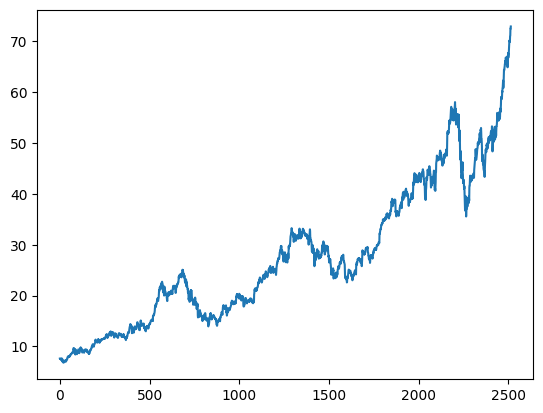

In [17]:
plt.plot(df.Close)

In [18]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

In [19]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

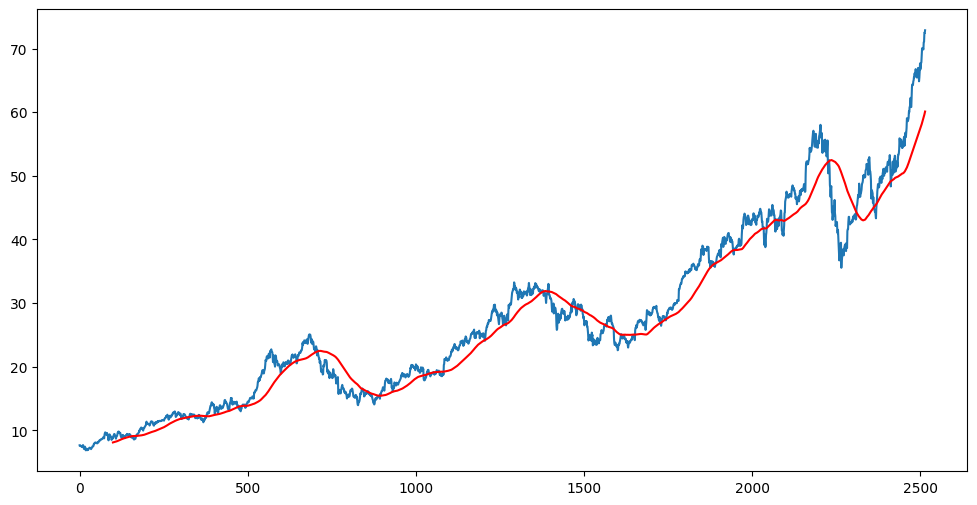

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

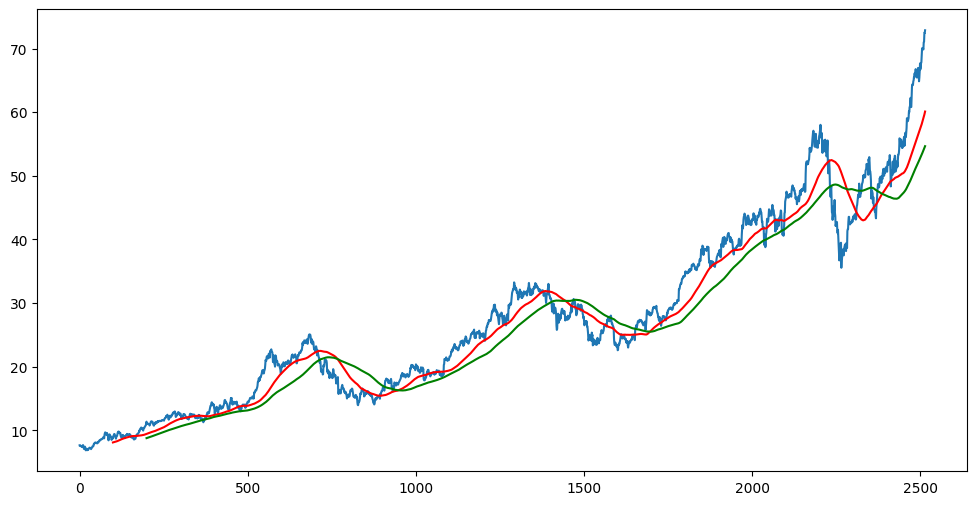

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [22]:
df.shape

(2515, 5)

### Splitting Data Into Training and Testing

In [23]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [24]:
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [25]:
print(data_training.head())

      Close
0  7.643214
1  7.656429
2  7.534643
3  7.520714
4  7.570714


In [26]:
print(data_testing.head())

          Close
1760  29.182501
1761  28.955000
1762  29.037500
1763  29.004999
1764  29.152500


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)

[[0.02971782]
 [0.03021854]
 [0.02560389]
 ...
 [0.84388656]
 [0.85089656]
 [0.84616011]]


In [29]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
print(x_train)
print(y_train)

[array([[2.97178191e-02],
       [3.02185410e-02],
       [2.56038878e-02],
       [2.50760817e-02],
       [2.69706691e-02],
       [2.44400837e-02],
       [2.12057268e-02],
       [2.51708129e-02],
       [2.35198380e-02],
       [1.87833875e-02],
       [3.11116846e-02],
       [2.66323796e-02],
       [2.16793646e-02],
       [7.71362572e-03],
       [1.49130326e-02],
       [1.87969205e-02],
       [2.14222733e-02],
       [9.79765742e-03],
       [1.35149573e-05],
       [3.62674239e-03],
       [5.15593812e-03],
       [9.71645927e-03],
       [0.00000000e+00],
       [4.61461711e-03],
       [2.80124591e-03],
       [5.60252796e-03],
       [4.15451231e-03],
       [8.95862792e-03],
       [1.12727391e-02],
       [1.53596224e-02],
       [1.42093514e-02],
       [1.47235702e-02],
       [1.30184452e-02],
       [1.13268532e-02],
       [6.77986503e-03],
       [1.16516638e-02],
       [1.34650350e-02],
       [1.70105973e-02],
       [2.29244210e-02],
       [2.27349587e-02],

In [30]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [31]:
x_train.shape

(1660, 100, 1)

# Model Implementation

In [32]:
from keras.layers import Dense, Dropout, LSTM
# from keras.layers import Sequential
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, LSTM

In [34]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


c:\Users\Jay\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - loss: 0.1571
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 0.0130
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - loss: 0.0113
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 0.0116
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - loss: 0.0096
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 376ms/step - loss: 0.0100
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 387ms/step - loss: 0.0081
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - loss: 0.0087
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 376ms/step - loss: 0.0082
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step - loss: 0.0090
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 389ms/step - loss: 0.0077
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - loss: 0.0076
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - loss: 0.0085
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - loss: 0.0064
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [37]:
model.save('keras_model.h5')

In [40]:
data_training.tail(100)

Close
1660  27.092501
1661  27.202499
1662  27.000000
1663  26.982500
1664  27.045000
...         ...
1755  29.264999
1756  29.072500
1757  29.129999
1758  29.315001
1759  29.190001

[100 rows x 1 columns]

In [38]:
data_testing.head()

Close
1760  29.182501
1761  28.955000
1762  29.037500
1763  29.004999
1764  29.152500

In [41]:
past_100_days = data_training.tail(100)

In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [46]:
final_df

Close
0    27.092501
1    27.202499
2    27.000000
3    26.982500
4    27.045000
..         ...
850  71.000000
851  71.067497
852  72.477501
853  72.449997
854  72.879997

[855 rows x 1 columns]

In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [48]:
input_data.shape

(855, 1)

In [61]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [63]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


### Making Predictions 

In [64]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step


In [67]:
y_predicted

array([[0.15205732],
       [0.15297005],
       [0.153817  ],
       [0.15456836],
       [0.15520094],
       [0.15570287],
       [0.15608212],
       [0.15636662],
       [0.15659218],
       [0.15679681],
       [0.15701123],
       [0.15725331],
       [0.157538  ],
       [0.15787618],
       [0.15826954],
       [0.15871376],
       [0.15920064],
       [0.15971762],
       [0.16026402],
       [0.16084626],
       [0.16146773],
       [0.16212451],
       [0.16280395],
       [0.16355741],
       [0.16446662],
       [0.1656053 ],
       [0.16703902],
       [0.16882354],
       [0.17099144],
       [0.17353472],
       [0.17642482],
       [0.17958169],
       [0.18289918],
       [0.18636616],
       [0.18996698],
       [0.19367765],
       [0.19746485],
       [0.20127273],
       [0.2050444 ],
       [0.2087253 ],
       [0.21226723],
       [0.21562877],
       [0.21879199],
       [0.22174874],
       [0.2244997 ],
       [0.22704798],
       [0.22939879],
       [0.231

In [65]:
y_predicted.shape

(755, 1)

In [66]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [68]:
scaler.scale_

array([0.02123255])

In [69]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

### Plotting the Predicted vs Original Price of the stock

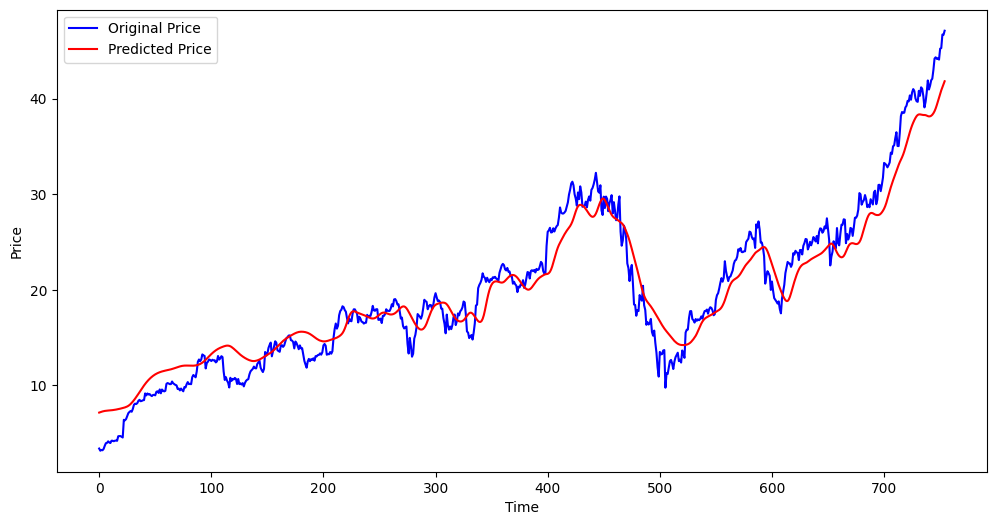

In [70]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()